In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from getpass import getuser

# Get the current user's name
user = getuser()

# Path to the dataset
data_path = rf'C:\Users\{user}\Documents\GitHub\dream-team-fpl-prediction\data\ds_gk.xlsx'

# Read the dataset
df = pd.read_excel(data_path)

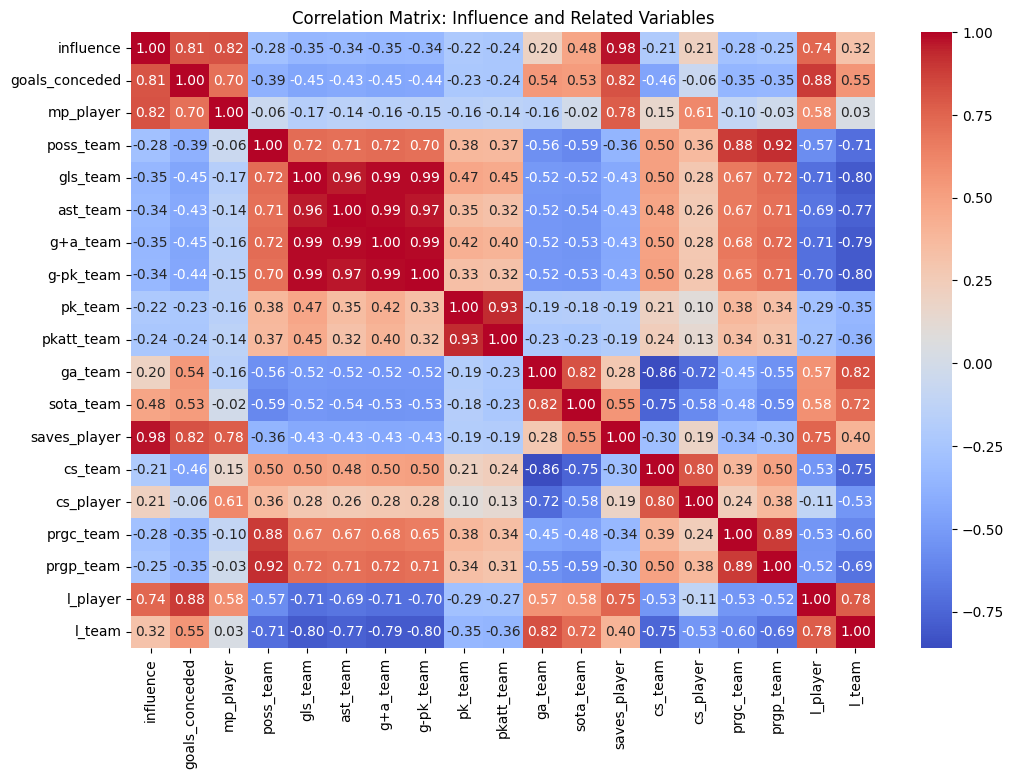

In [27]:
# Select relevant columns for analysis
columns_of_interest = [
    'influence', 'goals_conceded','mp_player',
    'poss_team', 'gls_team', 'ast_team', 'g+a_team', 'g-pk_team', 'pk_team','pkatt_team',
    'ga_team', 'sota_team', 'saves_player','cs_team', 'cs_player', 'prgc_team', 'prgp_team', 'l_player', 'l_team',
]

# Create a subset of the dataframe with these columns
df_subset = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Influence and Related Variables')
plt.show()

